# Medidas piezométricas en el Sinclinal de Calasparra
## Sondeos medidos en 2018

In [20]:
import collections
import getpass
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from os.path import join
import psycopg2
import pandas as pd
import pandas.io.sql as psql

%matplotlib widget

import sys
sys.path.append(r'C:\Users\solis\Documents\DEV\python3\common')
import plot_with_mpl as p

## Figure parameters

In [2]:
# graphs size
# default size 6.4 * 4.8
default_ratio = 6.4/4.8
print('defult ratio', 6.4/default_ratio)
x_cm = 11
x_in = x_cm / 2.54
y_in = x_in / default_ratio
print('x in', x_in)

defult ratio 4.8
x in 4.330708661417323


In [3]:
plt.rc('figure', figsize=(x_in, y_in))
plt.rc('font', size=8)
plt.rc('axes', labelsize=8, titlesize= 9, grid=True)
plt.rc('axes.spines', right=False, top=False)
plt.rc('xtick', direction='out', top=False)
plt.rc('ytick', direction='out', right=False)
plt.rc('lines', linewidth=0.8, linestyle='-', marker='.', markersize=4)
plt.rc('legend', fontsize=8, framealpha=0.5, loc='best')

plt.subplots_adjust(hspace=0.1, bottom=0.16, top=0.87)
plt.close()
# mpl.rcdefaults()

# plt.figure(dpi=80)

In [27]:
# Reload the module
from importlib import reload 
import plot_with_mpl
reload(plot_with_mpl)
import plot_with_mpl as p

## Database

In [4]:
db = getpass.getpass('DB: ')
user = getpass.getpass('User: ')
passw = getpass.getpass('Password: ')
con = psycopg2.connect(database=db, user=user, password=passw)

DB:  ···
User:  ········
Password:  ··


## Functions

## Data

### Piezometros

In [7]:
select = \
"""
select t.cod , t.toponimia , t.z, avg(t2.pnp) , min(t2.pnp) minpnp, max(t2.pnp) maxpnp, t.geom
from ipas.ipa1 t 
	join ipas.ipa2 t2 using (cod)
where t.acuifero = '042' and t2.fecha > '2018-01-01' and t2.fecha < '2018-12-31'
group by t.cod , t.toponimia
"""
piezos = psql.read_sql(select, con)
piezos = piezos['cod'].to_numpy()
dpzs = [(piez1, '') for piez1 in piezos]
dpzs = dict(dpzs)
dpzs = collections.OrderedDict(sorted(dpzs.items()))
dpzs.keys()

odict_keys(['253530017', '253535001', '253535002', '253535003', '253540013', '253570002', '253575001', '253575002', '253575003', '253575004', '253575005', '253575006', '253575007', '253575008', '253575009', '253580002', '253580003', '253580006', '253580007', '253585004', '253585005', '263450049', '263460052'])

In [8]:
for piez1 in dpzs.keys():
    select = \
    """
    select t1.cod, t1.z, t1.toponimia , t2.fecha, t2.situacion , t2.pnp, t1.z-t2.pnp cnp
    from ipas.ipa1 t1
        join ipas.ipa2 t2 using(cod)
    where t1.cod = %s
    order by t2.cod, t2.fecha
    """
    dpzs[piez1] = psql.read_sql(select, con, params=(piez1,))
    if len(dpzs[piez1]) == 0:
        raise ValueError(f'el piezómetro {piez1} no tiene datos')


In [9]:
dpzs['253530017'].head()

,cod,z,toponimia,fecha,situacion,pnp,cnp
0,253530017,278.0,Cantera,2002-01-30 00:00:00+01:00,e,30.85,247.150000
1,253530017,278.0,Cantera,2002-03-20 00:00:00+01:00,e,31.67,246.330000
2,253530017,278.0,Cantera,2002-05-10 00:00:00+02:00,e,31.28,246.719999
3,253530017,278.0,Cantera,2002-06-17 00:00:00+02:00,e,29.81,248.190001
4,253530017,278.0,Cantera,2002-07-07 00:00:00+02:00,e,29.81,248.190001


253530017
253535001
253535002
253535003
253540013
253570002
253575001
253575002
253575003
253575004
253575005
253575006
253575007
253575008
253575009
253580002
253580003
253580006
253580007
253585004
253585005
263450049
263460052


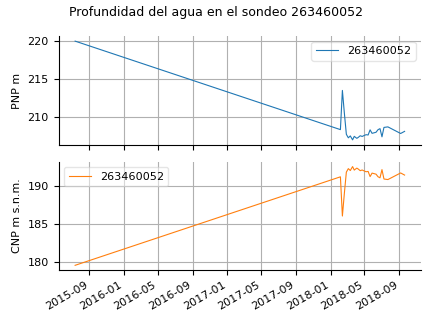

In [29]:
dir_out = r'H:\LSGB\20220513_SC\xy_pnp_2018'
for pz1 in dpzs:
    print(pz1)
    fout = join(dir_out, f'{pz1}.png')
    p.subplot_nv([dpzs[pz1]['fecha'],dpzs[pz1]['fecha']],
                 [dpzs[pz1]['pnp'], dpzs[pz1]['cnp']],
                 [f'{pz1}', f'{pz1}'],
                 f'Profundidad del agua en el sondeo {pz1}', 
                 ['PNP m','CNP m s.n.m.'], plot=[True, True], fout=fout)

In [ ]:
    p.subplot_nv([df_cnp['fecha'],],
                 [df_cnp['v'], df_plv['v']],
                 [f'{pz1.upper()}', f'Pluv. {df_plv["id"][0].upper()}'],
                 f'Cota piezómetrica en el sondeo {pz1.upper()}', 
                 ['CNP m s.n.m.', 'Prec. mm'], fout=fout)
